In [2]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset, get_dataset_config_names
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import FrenchStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
%matplotlib inline

In [5]:
configs = get_dataset_config_names("amazon_reviews_multi")
configs

['all_languages', 'de', 'en', 'es', 'fr', 'ja', 'zh']

In [6]:
french_data = load_dataset("amazon_reviews_multi", "fr")
english_data = load_dataset("amazon_reviews_multi", "en")
print("french => ", french_data)
print("english => ", english_data)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/fr/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

french =>  DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})
english =>  DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test

In [7]:
#Convert french data to pandas 
french_data_train = french_data['train']
df_french_data_train = pd.DataFrame(french_data_train)
french_data_validation = french_data['validation']
df_french_data_validation = pd.DataFrame(french_data_validation)
french_data_test = french_data['test']
df_french_data_test = pd.DataFrame(french_data_test)

In [8]:
df_french_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [9]:
#Convert english data to pandas 
english_data_train = english_data['train']
df_english_data_train = pd.DataFrame(english_data_train)
english_data_validation = english_data['validation']
df_english_data_validation = pd.DataFrame(english_data_validation)
english_data_test = english_data['test']
df_english_data_test = pd.DataFrame(english_data_test)

In [10]:
df_french_data_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller - Article n'a fonctionné qu'une...,Brumisateur à pompe,fr,beauty
1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez être déçu achetez le produit ! ...,Insatisfaisant,fr,baby_product
2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,"Écran de mauvaise qualité, car il s'use en peu...",Ne recommande pas,fr,pc
3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne sert à rien les sons sont pourris...,A éviter!,fr,musical_instruments
4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit mais la grue n'a pas fonctio...,Déçue,fr,toy
...,...,...,...,...,...,...,...,...
199995,fr_0907472,product_fr_0369223,reviewer_fr_0155780,5,Très jolies boucles! Très belle qualité ! Elle...,Top,fr,jewelry
199996,fr_0345478,product_fr_0271680,reviewer_fr_0933970,5,Superbe. Ultra rapide. Tres bel écran. Il y a ...,Confirme à sa reputation de smartphone le plus...,fr,wireless
199997,fr_0195162,product_fr_0132362,reviewer_fr_0820277,5,facile d'utilisation mais un peu lourd,pratique,fr,kitchen
199998,fr_0250763,product_fr_0966190,reviewer_fr_0485706,5,livré vite et bon produit,livré vite et bon produit,fr,beauty


In [11]:
#Nombre d'occurence par notes
df_french_data_train.stars.value_counts()

1    40000
2    40000
3    40000
4    40000
5    40000
Name: stars, dtype: int64

In [12]:
#Extraction d'un echantillon de 2000 par note en francais
sample_french_2000 = pd.DataFrame();
for i in range(1,6):
  notes = df_french_data_train[df_french_data_train["stars"] == i]
  sample_french_2000 = pd.concat([sample_french_2000, notes.sample(2000)], ignore_index=True)
sample_french_2000

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0545071,product_fr_0353731,reviewer_fr_0784075,1,La montre n'a jamais fonctionné et en plus il ...,Grosse merde a eviter,fr,watch
1,fr_0700551,product_fr_0112842,reviewer_fr_0080099,1,Au bout d une semaine le produit ne marchait plus,Chargeur,fr,wireless
2,fr_0143430,product_fr_0441709,reviewer_fr_0276039,1,Ne fonctionne plus au bout de 1 semaine. A eviter,Nul !,fr,electronics
3,fr_0305112,product_fr_0942936,reviewer_fr_0592836,1,"Je ne recommande absolument pas ce produit, le...",N'achetez jamais ça,fr,pc
4,fr_0523076,product_fr_0360625,reviewer_fr_0512276,1,"chargeur retourné car ne charge pas , de plus ...",NE FONCTIONNE PAS,fr,wireless
...,...,...,...,...,...,...,...,...
9995,fr_0680229,product_fr_0576921,reviewer_fr_0882232,5,"Très bon produit, pas de goût chimique, je sui...",Arôme,fr,drugstore
9996,fr_0900385,product_fr_0186323,reviewer_fr_0219996,5,Très fin et léger. Je n'ai pas encore testé la...,Fin et léger,fr,wireless
9997,fr_0254075,product_fr_0364343,reviewer_fr_0266318,5,Le produit Correspond a mes attentes le teleph...,Coque j7,fr,wireless
9998,fr_0179759,product_fr_0953785,reviewer_fr_0340351,5,Parfait comme d’habitude ! Les photos couleurs...,Très bien,fr,book


In [13]:
#Extraction d'un echantillon de 2000 par note en anglais
sample_english_2000 = pd.DataFrame();
for i in range(1,6):
  notes = df_english_data_train[df_english_data_train["stars"] == i]
  sample_english_2000 = pd.concat([sample_english_2000, notes.sample(2000)], ignore_index=True)
sample_english_2000

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0097214,product_en_0803189,reviewer_en_0972642,1,Water is constantly room temp.,One Star,en,kitchen
1,en_0167199,product_en_0161016,reviewer_en_0943280,1,Got this in 2 days ago & colored light switch ...,One Star,en,home
2,en_0662817,product_en_0531908,reviewer_en_0476422,1,I did everything that the cleanse recommend ev...,Waste of 3 days,en,drugstore
3,en_0599632,product_en_0007237,reviewer_en_0972299,1,2 weeks crack in corner and kept cracking whil...,Not satisfied with product,en,wireless
4,en_0528494,product_en_0907261,reviewer_en_0540877,1,It's expired when it arrived ! Should be fresh...,Expired product,en,grocery
...,...,...,...,...,...,...,...,...
9995,en_0067540,product_en_0459663,reviewer_en_0764819,5,As described. Works great.,Great,en,sports
9996,en_0427021,product_en_0996965,reviewer_en_0458354,5,Good fog lights. Not the brightest but works f...,Nice fog lights.,en,automotive
9997,en_0299345,product_en_0337234,reviewer_en_0354914,5,"This is the perfect dock, no extra software to...",good,en,pc
9998,en_0479096,product_en_0398305,reviewer_en_0119872,5,"Felt, looked, smelled, and tasted as advertised.",Five Stars,en,apparel


In [14]:
#concatener les 2 dataframes anglais et francais
df_train = pd.concat([sample_french_2000, sample_english_2000], ignore_index=True)
df_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0545071,product_fr_0353731,reviewer_fr_0784075,1,La montre n'a jamais fonctionné et en plus il ...,Grosse merde a eviter,fr,watch
1,fr_0700551,product_fr_0112842,reviewer_fr_0080099,1,Au bout d une semaine le produit ne marchait plus,Chargeur,fr,wireless
2,fr_0143430,product_fr_0441709,reviewer_fr_0276039,1,Ne fonctionne plus au bout de 1 semaine. A eviter,Nul !,fr,electronics
3,fr_0305112,product_fr_0942936,reviewer_fr_0592836,1,"Je ne recommande absolument pas ce produit, le...",N'achetez jamais ça,fr,pc
4,fr_0523076,product_fr_0360625,reviewer_fr_0512276,1,"chargeur retourné car ne charge pas , de plus ...",NE FONCTIONNE PAS,fr,wireless
...,...,...,...,...,...,...,...,...
19995,en_0067540,product_en_0459663,reviewer_en_0764819,5,As described. Works great.,Great,en,sports
19996,en_0427021,product_en_0996965,reviewer_en_0458354,5,Good fog lights. Not the brightest but works f...,Nice fog lights.,en,automotive
19997,en_0299345,product_en_0337234,reviewer_en_0354914,5,"This is the perfect dock, no extra software to...",good,en,pc
19998,en_0479096,product_en_0398305,reviewer_en_0119872,5,"Felt, looked, smelled, and tasted as advertised.",Five Stars,en,apparel


#choix des variables d'interets
#1- stars, review_body pour la classification du sentiment
#2- review_title et product_category pour la proposition de réponse

In [15]:
df_train = df_train.sample(20000)
df_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
7312,fr_0613038,product_fr_0243686,reviewer_fr_0903342,4,Intrigue bien menée et suspens maintenu jusqu'...,Bon polar,fr,digital_ebook_purchase
10811,en_0516377,product_en_0014737,reviewer_en_0061936,1,Not Working with in 3 months.,Not Working with in 3 months.,en,electronics
4157,fr_0908459,product_fr_0135405,reviewer_fr_0582263,3,Bien mais un peu lourd. De plus la rotule manq...,Bien mais,fr,camera
1601,fr_0125914,product_fr_0294470,reviewer_fr_0628574,1,Voilà comment j'ai reçu mon produit éclaté dan...,Avoir une meilleurs livraison,fr,beauty
17585,en_0656747,product_en_0232637,reviewer_en_0780105,4,So far I am impressed with the quality of the ...,Clear Photos,en,camera
...,...,...,...,...,...,...,...,...
18828,en_0302276,product_en_0992008,reviewer_en_0901486,5,They are the perfect size and super fashionabl...,Love Love Love,en,office_product
2311,fr_0292349,product_fr_0393080,reviewer_fr_0602099,2,Produit trop grand les coupes sont pas très bi...,Valérie,fr,apparel
15926,en_0968147,product_en_0419192,reviewer_en_0025356,3,I like the fact it pulls you in and doesn’t sl...,Great Waste trainer,en,apparel
6078,fr_0025538,product_fr_0080596,reviewer_fr_0372576,4,belles finitions...plus fines que je pensais...,fines et legères,fr,sports


In [16]:
df_train.head(30)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
7312,fr_0613038,product_fr_0243686,reviewer_fr_0903342,4,Intrigue bien menée et suspens maintenu jusqu'...,Bon polar,fr,digital_ebook_purchase
10811,en_0516377,product_en_0014737,reviewer_en_0061936,1,Not Working with in 3 months.,Not Working with in 3 months.,en,electronics
4157,fr_0908459,product_fr_0135405,reviewer_fr_0582263,3,Bien mais un peu lourd. De plus la rotule manq...,Bien mais,fr,camera
1601,fr_0125914,product_fr_0294470,reviewer_fr_0628574,1,Voilà comment j'ai reçu mon produit éclaté dan...,Avoir une meilleurs livraison,fr,beauty
17585,en_0656747,product_en_0232637,reviewer_en_0780105,4,So far I am impressed with the quality of the ...,Clear Photos,en,camera
17292,en_0333118,product_en_0910780,reviewer_en_0643002,4,I got this to attach to a wreath. It arrived b...,"The product is great, but packaging sucked - i...",en,home
13212,en_0285130,product_en_0086433,reviewer_en_0682338,2,It's a great tool and having calculator is a b...,Battery life is poor,en,pc
2327,fr_0406365,product_fr_0563472,reviewer_fr_0851118,2,"Je suis assez déçue par ce produit, on dirait ...",Déçue ...,fr,jewelry
5701,fr_0731231,product_fr_0077940,reviewer_fr_0642546,3,J ai dû commander deux fois le collier. Le pre...,Fête des mères,fr,jewelry
121,fr_0978182,product_fr_0731580,reviewer_fr_0033981,1,"Acheté en pré-commande, facturé mais toujours ...",Arnaque,fr,digital_ebook_purchase


<Axes: xlabel='stars', ylabel='Density'>

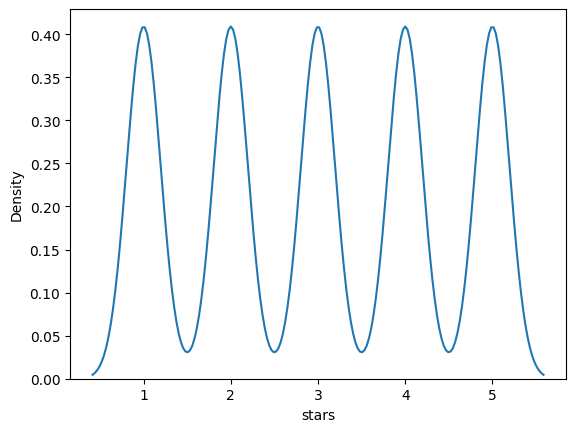

In [17]:
#sns.histplot(data=df_train, x='stars')
sns.kdeplot(data=df_train, x='stars')

In [18]:
df_train = df_train[["stars", "review_body", "review_title", "language", "product_category"]]
df_train

,stars,review_body,review_title,language,product_category
7312,4,Intrigue bien menée et suspens maintenu jusqu'...,Bon polar,fr,digital_ebook_purchase
10811,1,Not Working with in 3 months.,Not Working with in 3 months.,en,electronics
4157,3,Bien mais un peu lourd. De plus la rotule manq...,Bien mais,fr,camera
1601,1,Voilà comment j'ai reçu mon produit éclaté dan...,Avoir une meilleurs livraison,fr,beauty
17585,4,So far I am impressed with the quality of the ...,Clear Photos,en,camera
...,...,...,...,...,...
18828,5,They are the perfect size and super fashionabl...,Love Love Love,en,office_product
2311,2,Produit trop grand les coupes sont pas très bi...,Valérie,fr,apparel
15926,3,I like the fact it pulls you in and doesn’t sl...,Great Waste trainer,en,apparel
6078,4,belles finitions...plus fines que je pensais...,fines et legères,fr,sports


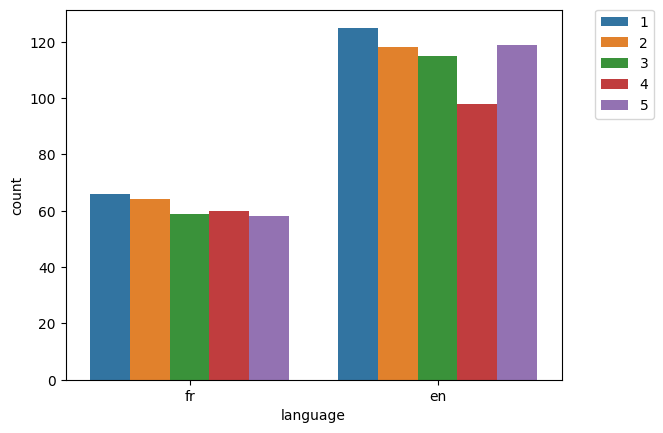

In [19]:
#sns.barplot(data=df_train, x='language', y='stars', errorbar=None, estimator=count, hue='stars')
#plt.legend(bbox_to_anchor=(1.3, 1.02))
mask = df_train.loc[df_train["product_category"] == "drugstore", ]
sns.countplot(data=mask, x="language", hue="stars")
plt.legend(bbox_to_anchor=(1.2, 1.02))

In [20]:
stop_words = ["le", "de", "produit", "pour", "et", "la", "les", "sur", "à", "en", "une", "un", "est", "quand", "ce", "cette", "d", "que", "se", "au", "des", "moi", "mon", "du","tout"]

In [21]:
def preprocessing_doc(corpus):
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  words = []
  #stopwords = nltk.corpus.stopwords.words('french')
  #stocker les tokens de -3 lettres dans un tableau
  for doc in corpus:
    words += [word for word in tokenizer.tokenize(doc.lower()) if word not in stop_words]

  #trouver les mots fréquents et peu intuitifs
  #freq = nltk.FreqDist(words)

  return words

In [22]:
def note_freq(df_train, stars, language):
  mask1 = df_train["stars"] == stars
  mask2 = df_train["language"] == language
  mask = mask1 & mask2
  df_word_note = df_train.loc[mask, "review_title"]
  df_word_note = np.array(df_word_note).tolist()
  return df_word_note

In [26]:
df_word_note1_fr = note_freq(df_train, 1, "fr")
df_word_note2_fr = note_freq(df_train, 2, "fr")
df_word_note3_fr = note_freq(df_train, 3, "fr")
df_word_note4_fr = note_freq(df_train, 4, "fr")
df_word_note5_fr = note_freq(df_train, 5, "fr")

df_word_note1_en = note_freq(df_train, 1, "en")
df_word_note1_en = note_freq(df_train, 2, "en")
df_word_note1_en = note_freq(df_train, 3, "en")
df_word_note1_en = note_freq(df_train, 4, "en")
df_word_note1_en = note_freq(df_train, 5, "en")

df_preprocess_note1_fr = preprocessing_doc(df_word_note1_fr)
df_preprocess_note2_fr = preprocessing_doc(df_word_note2_fr)
df_preprocess_note3_fr = preprocessing_doc(df_word_note3_fr)
df_preprocess_note4_fr = preprocessing_doc(df_word_note4_fr)
df_preprocess_note5_fr = preprocessing_doc(df_word_note5_fr)
df_preprocess_notes_fr = []
df_preprocess_notes_fr.append(df_preprocess_note1_fr)
df_preprocess_notes_fr.append(df_preprocess_note2_fr)
df_preprocess_notes_fr.append(df_preprocess_note3_fr)
df_preprocess_notes_fr.append(df_preprocess_note4_fr)
df_preprocess_notes_fr.append(df_preprocess_note5_fr)

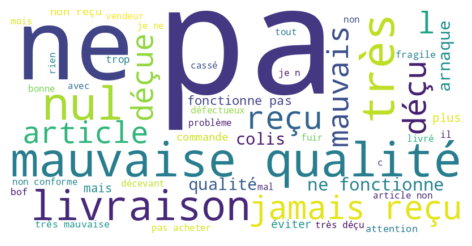

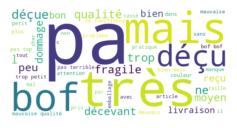

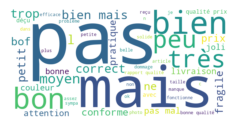

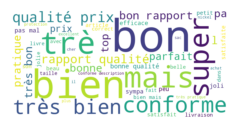

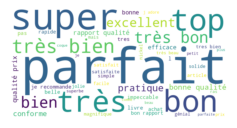

In [29]:
plt.figure(figsize=(40, 10))
for i in range(5):
# Initialisez l'objet WordCloud avec les options souhaitées
  wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(' '.join(df_preprocess_notes_fr[i]))
  # Affichez le nuage de mots en utilisant Matplotlib
  plt.subplot(3, 2, i+1)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [25]:
!pip install transformers
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
